In [102]:
import numpy as np
import pandas as pd
import matplotlib as plt
# make plots appear and be stored within the notebook
%matplotlib inline

# EX1 
## 1.1

In [105]:
#read the data using pandas
Sig_Eqs=pd.read_csv("earthquakes-2022-10-26_18-25-54_+0800.tsv",delimiter="\t")
Sig_Eqs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 48 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Search Parameters                   1 non-null      object 
 1   Year                                6337 non-null   float64
 2   Mo                                  5926 non-null   float64
 3   Dy                                  5770 non-null   float64
 4   Hr                                  4286 non-null   float64
 5   Mn                                  4081 non-null   float64
 6   Sec                                 4424 non-null   float64
 7   Tsu                                 1952 non-null   float64
 8   Vol                                 77 non-null     float64
 9   Country                             6336 non-null   object 
 10  Area                                326 non-null    object 
 11  Region                              6337 no

In [4]:
# compute the total death number and sort the index by the values
death_number=Sig_Eqs.groupby(["Country"]).sum()["Deaths"].sort_values(ascending=False)
# read the first 20 countries
death_number.head(20)

Country
CHINA           2075019.0
TURKEY          1134569.0
IRAN            1011446.0
ITALY            498477.0
SYRIA            439224.0
HAITI            323474.0
AZERBAIJAN       317219.0
JAPAN            278142.0
ARMENIA          191890.0
PAKISTAN         145083.0
IRAQ             136200.0
ECUADOR          135479.0
TURKMENISTAN     117412.0
PERU             102219.0
ISRAEL            90388.0
PORTUGAL          83531.0
GREECE            79174.0
CHILE             64276.0
INDIA             63491.0
TAIWAN            57135.0
Name: Deaths, dtype: float64

## 1.2


<AxesSubplot:xlabel='Year', ylabel='earthquake with magnitude exceed 3 per year'>

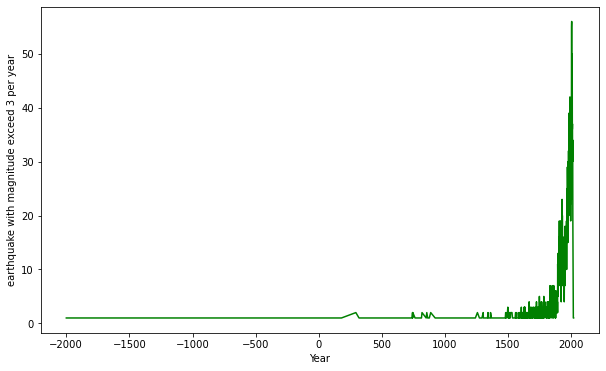

In [106]:
earthquake_years=Sig_Eqs.loc[Sig_Eqs["Ms"]>3].groupby(["Year"])
earthquake_years["Ms"].count().plot(xlabel="Year",ylabel="earthquake with magnitude exceed 3 per year",figsize=(10, 6),color="green",kind="line")


>the tread of the deaths in earthquake between -2000 to 1500 is almost stable, and it had a sharp increase between 1500-2000. I think the rapid multiplying of the population and assembling of houses are the main reason which caused this phenomenon.Besides,the recording may lose across the ages.

## 1.3

In [6]:
death_number=Sig_Eqs.loc[:,["Country","Location Name","Ms"]]
death_number

,Country,Location Name,Ms
0,NaN,NaN,NaN
1,JORDAN,"JORDAN: BAB-A-DARAA,AL-KARAK",NaN
2,SYRIA,SYRIA: UGARIT,NaN
3,TURKMENISTAN,TURKMENISTAN: W,7.1
4,GREECE,GREECE: THERA ISLAND (SANTORINI),NaN
...,...,...,...
6333,MEXICO,"MEXICO: MICHOACAN, COLIMA, JALISCO",NaN
6334,MEXICO,"MEXICO: MEXICO CITY, MICHOACAN",NaN
6335,INDONESIA,INDONESIA: SUMATRA,NaN
6336,IRAN,IRAN: KHOY; WEST AZERBAIJAN,NaN


In [7]:
def CountEq_LargestEq():
    death_number[]

SyntaxError: invalid syntax (3200934251.py, line 2)

# Ex2 air temperature in Shenzhen



In [9]:
Air_temp=pd.read_csv("Baoan_Weather_1998_2022.csv")
Air_temp.info()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_20960\4145672413.py:1: DtypeWarning: Columns (4,8,9,10,11,14,15,24,25,27,29,31,34,37,38,40,41,45,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  Air_temp=pd.read_csv("Baoan_Weather_1998_2022.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235674 entries, 0 to 235673
Data columns (total 54 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   STATION            235674 non-null  int64  
 1   DATE               235674 non-null  object 
 2   SOURCE             235674 non-null  int64  
 3   REPORT_TYPE        235674 non-null  object 
 4   CALL_SIGN          235674 non-null  object 
 5   QUALITY_CONTROL    235674 non-null  object 
 6   AA1                24482 non-null   object 
 7   AA2                5923 non-null    object 
 8   AA3                3207 non-null    object 
 9   AG1                7307 non-null    object 
 10  AJ1                679 non-null     object 
 11  AW1                3 non-null       object 
 12  AY1                15557 non-null   object 
 13  AY2                9200 non-null    object 
 14  AZ1                3 non-null       object 
 15  CALL_SIGN.1        235674 non-null  object 
 16  CI

In [10]:
#first,we need to identify whether this is missing values by using count()
Air_temp.count()


STATION              235674
DATE                 235674
SOURCE               235674
REPORT_TYPE          235674
CALL_SIGN            235674
QUALITY_CONTROL      235674
AA1                   24482
AA2                    5923
AA3                    3207
AG1                    7307
AJ1                     679
AW1                       3
AY1                   15557
AY2                    9200
AZ1                       3
CALL_SIGN.1          235674
CIG                  235674
DEW                  235674
ED1                    1210
EQD                   73120
GA1                  132689
GA2                   52828
GA3                   10352
GA4                     470
GA5                       2
GE1                   53148
GF1                  176884
HL1                       2
IA1                       0
IA2                    1791
KA1                   19563
KA2                    3713
MA1                  216152
MD1                   64222
ME1                       2
MW1                 

In [11]:
# detect if there are values=9999,which stands for missing
Air_temp.loc[Air_temp["TMP"]==9999].count()
#remove the missing data and convert the object form into float
Air_temp["tem"]=0.1*Air_temp["TMP"].apply(lambda x: x.replace("1+","").replace(",","")).astype("float")
Air_temp=Air_temp.loc[Air_temp["tem"]<500]


In [12]:
# So we finally get temperature data
Air_temp["tem"].max()
Air_temp.head()

,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AG1,...,SA1,SLP,SOURCE.1,TMP,UA1,UG1,VIS,WG1,WND,tem
0,59493099999,1998-01-01T00:00:00,4,SY-MT,ZGSZ,V020,"06,0000,9,1",NaN,NaN,"0,000",...,NaN,"10184,1",4,"+0186,1",NaN,NaN,"008000,1,N,1",NaN,"040,1,N,0040,1",186.1
1,59493099999,1998-01-01T01:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,NaN,"99999,9",4,"+0220,1",NaN,NaN,"003300,1,N,1",NaN,"130,1,N,0020,1",220.1
2,59493099999,1998-01-01T02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,NaN,"99999,9",4,"+0240,1",NaN,NaN,"003500,1,N,1",NaN,"110,1,N,0020,1",240.1
3,59493099999,1998-01-01T03:00:00,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,"0,000",...,NaN,"10185,1",4,"+0221,1",NaN,NaN,"011000,1,N,1",NaN,"090,1,N,0020,1",221.1
4,59493099999,1998-01-01T04:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,NaN,"99999,9",4,"+0240,1",NaN,NaN,"005000,1,N,1",NaN,"270,1,N,0030,1",240.1


In [32]:
# the next step is get the month and year 
Air_temp["Month"]=pd.to_datetime(Air_temp["DATE"]).dt.month
Air_temp["Year"]=pd.to_datetime(Air_temp["DATE"]).dt.year


<AxesSubplot:xlabel='Month', ylabel='The average temperature per month'>

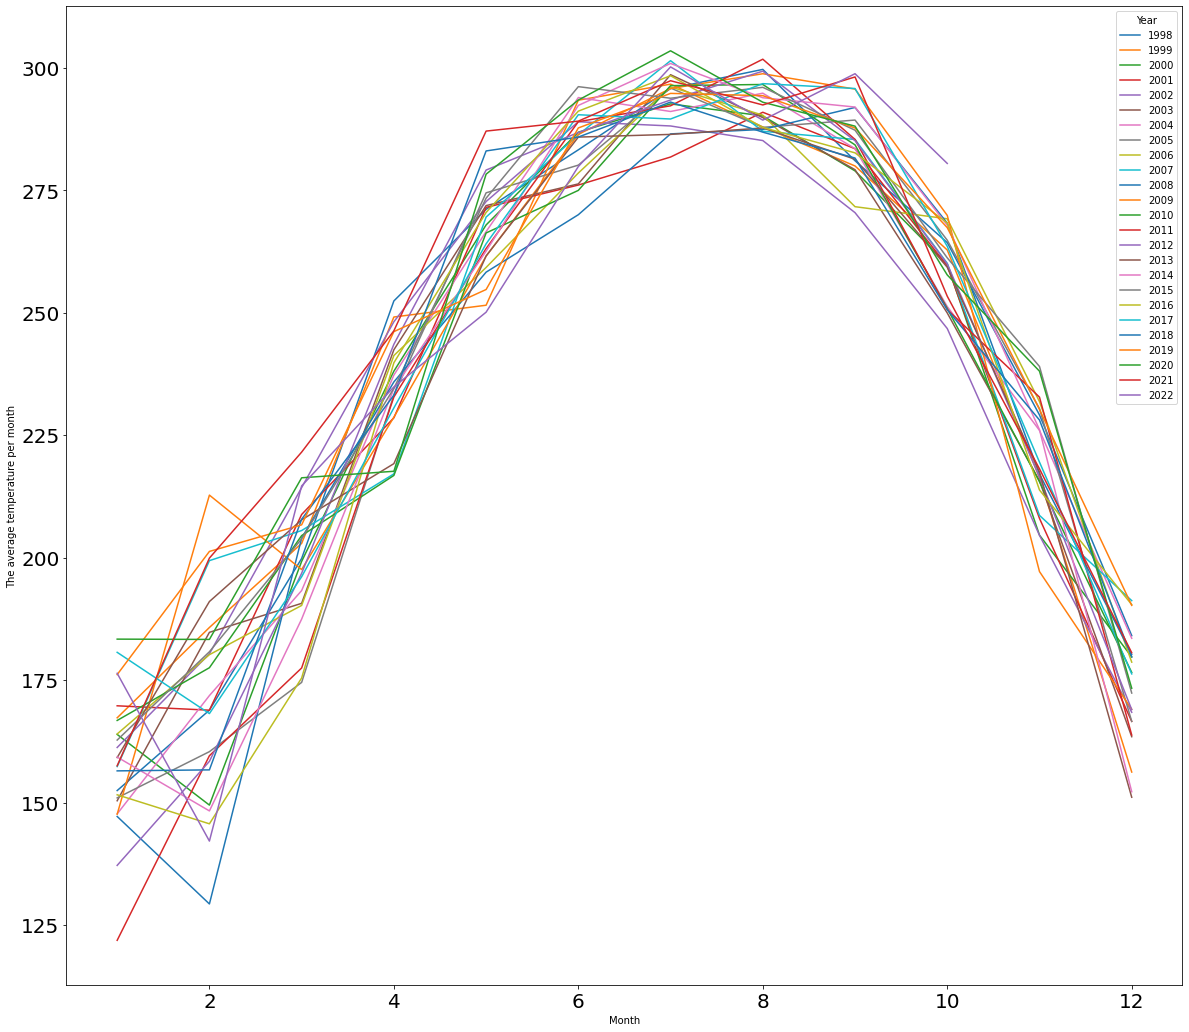

In [37]:
#compute the average temperature and using unstack() to spearate the information stored in groupby
Air_temp.groupby(["Month","Year"]).mean()["tem"].unstack().plot(figsize=(20,18),ylabel="The average temperature per month",fontsize=20)

# ex3 Global collection of hurricanes

In [83]:
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 skiprows=[1, 2], 
                 parse_dates=['ISO_TIME'],
                 na_values={"NAME":'NOT_NAMED',"WMO_WIND":" "}

SyntaxError: unexpected EOF while parsing (2403334847.py, line 5)

In [79]:
df["WMO_WIND"].astype("float")
df["ISO_TIME"]=pd.to_datetime(df["ISO_TIME"])

In [84]:
#ex 3.1
df.sort_values("WMO_WIND",ascending=False).groupby("SID")["NAME"].head(10)

665954    PATRICIA
665952    PATRICIA
665956    PATRICIA
427636       ALLEN
178212         NaN
            ...   
707160        KARL
707161        KARL
707173         NaN
707174         NaN
707175         NaN
Name: NAME, Length: 134350, dtype: object

<AxesSubplot:xlabel='NAME'>

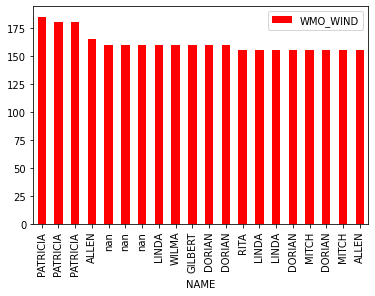

In [85]:
#ex 3.2
df.sort_values("WMO_WIND",ascending=False).head(20).plot(x="NAME",y="WMO_WIND",kind="bar",color="red")

<AxesSubplot:xlabel='BASIN'>

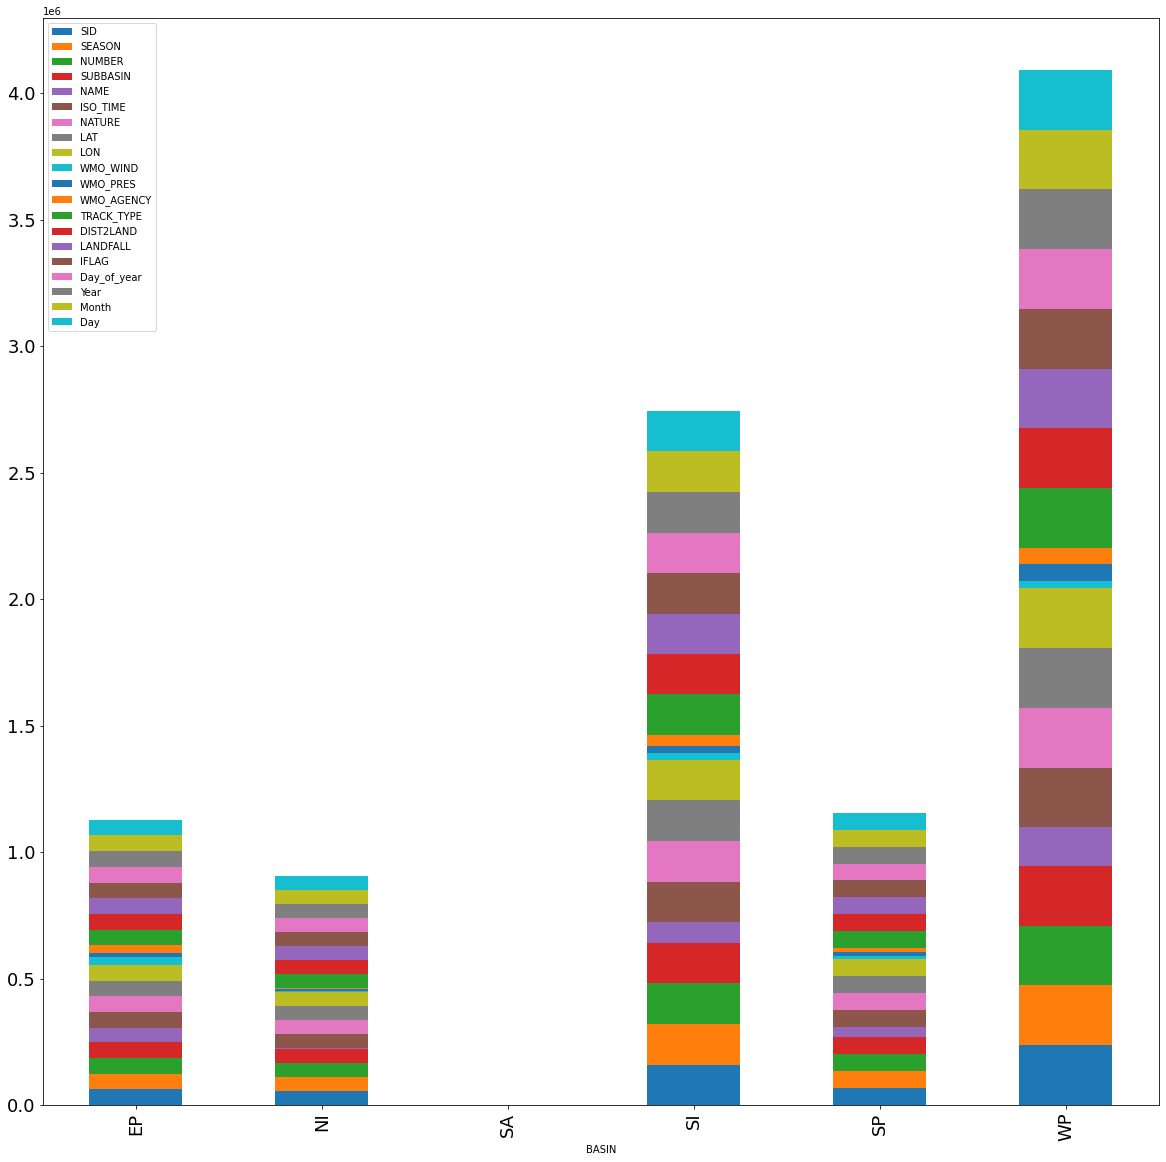

In [86]:
#ex 3.3
df.groupby("BASIN").count().plot(kind="bar",figsize=(20,20),fontsize=18,stacked=True)

<AxesSubplot:xlabel='LAT', ylabel='LON'>

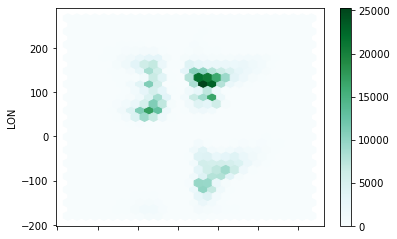

In [87]:
#EX 3.4 make a hexbin plot od location
df.plot.hexbin(x="LAT",y="LON",gridsize=27,label="the location of datapoints")

In [88]:
#ex3.5 
# first, find typhoon manakhut in 2018

df["Year"]=pd.to_datetime(df["ISO_TIME"]).dt.year
df["Month"]=pd.to_datetime(df["ISO_TIME"]).dt.month
df["Day"]=pd.to_datetime(df["ISO_TIME"]).dt.day
df2=df.loc[ (df["NAME"]=="MANGKHUT") & (df["SEASON"]==2018) ]

<AxesSubplot:xlabel='LAT', ylabel='LON'>

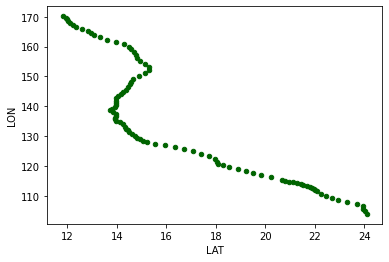

In [89]:
#then, print the scatter plot using mataploit
df2.plot.scatter(x="LAT",y="LON",color="DarkGreen")

In [30]:
#ex 3.6 using df3 to stand for the dataframe for the rest questions
df3=df.loc[((df["BASIN"]=="WP") | (df["BASIN"]=="EP"))& (df["SEASON"]>=1970)  ]
df3

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
350393,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 00:00:00,TS,7.00000,151.400,NaN,1006.0,tokyo,main,1088,1088.0,_OO___________
350394,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 03:00:00,TS,7.24752,151.205,NaN,NaN,NaN,main,1109,1109.0,_PP___________
350395,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 06:00:00,TS,7.50000,151.000,NaN,1002.0,tokyo,main,1143,1143.0,_OO___________
350396,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 09:00:00,TS,7.75747,150.772,NaN,NaN,NaN,main,1171,1168.0,_PP___________
350397,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 12:00:00,TS,8.00000,150.500,NaN,998.0,tokyo,main,1182,1179.0,_OO___________
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707084,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 15:00:00,TS,13.99570,-90.294,NaN,NaN,NaN,PROVISIONAL,0,0.0,P_____________
707085,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 18:00:00,NR,14.50000,-91.000,NaN,NaN,NaN,PROVISIONAL,0,NaN,O_____________
707173,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 12:00:00,NR,15.20000,151.300,NaN,NaN,NaN,PROVISIONAL,1985,1974.0,O_____________
707174,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 15:00:00,NR,15.05000,151.325,NaN,NaN,NaN,PROVISIONAL,1974,1952.0,P_____________


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11040\2578935874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Date"]=pd.to_datetime(df3["ISO_TIME"]).dt.floor("d")


<AxesSubplot:ylabel='Frequency'>

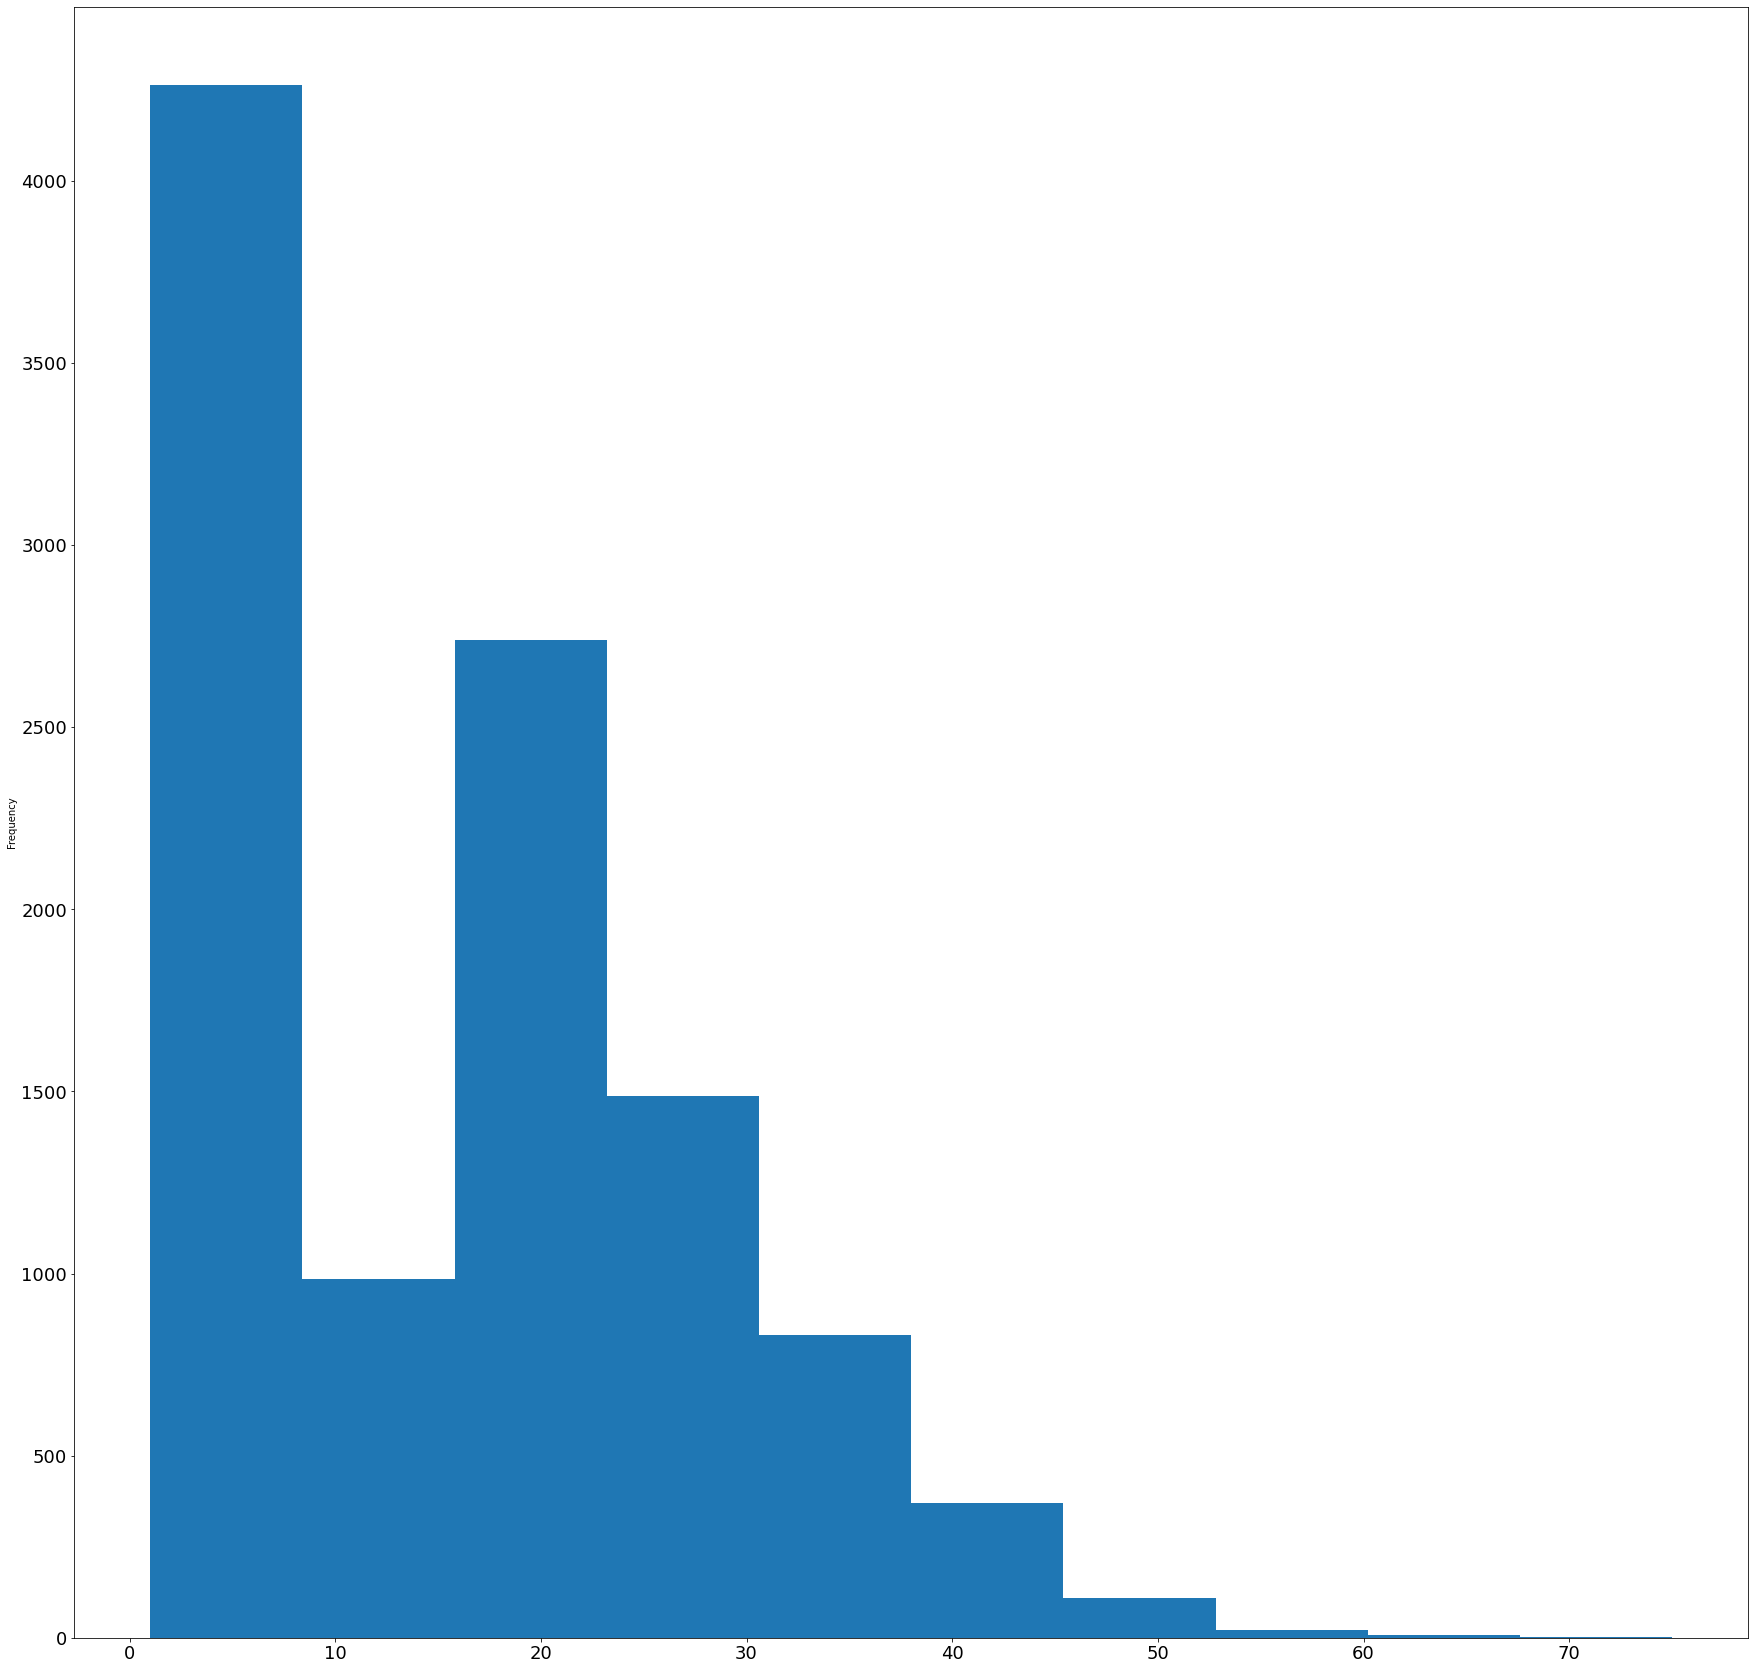

In [31]:
#3.7 plot datapoints per day
df3["Date"]=pd.to_datetime(df3["ISO_TIME"]).dt.floor("d")
# plot the numbers
df3.groupby("Date")["LAT"].count().plot(figsize=(30,30),fontsize=18,stacked=True,kind="hist")

In [37]:
#3.8
df3["Day_of_year"]=pd.to_datetime(df3["ISO_TIME"]).dt.day_of_year

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11040\736370400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Day_of_year"]=pd.to_datetime(df3["ISO_TIME"]).dt.day_of_year


In [51]:
df3.groupby(["SEASON","Day_of_year"])["SID"].count()

SEASON  Day_of_year
2022    179             7
        180             2
        181            10
        182            16
        183            17
                       ..
        277             9
        278             7
        282             1
        283             7
        285             3
Name: SID, Length: 100, dtype: int64

<AxesSubplot:xlabel='SEASON,Day_of_year'>

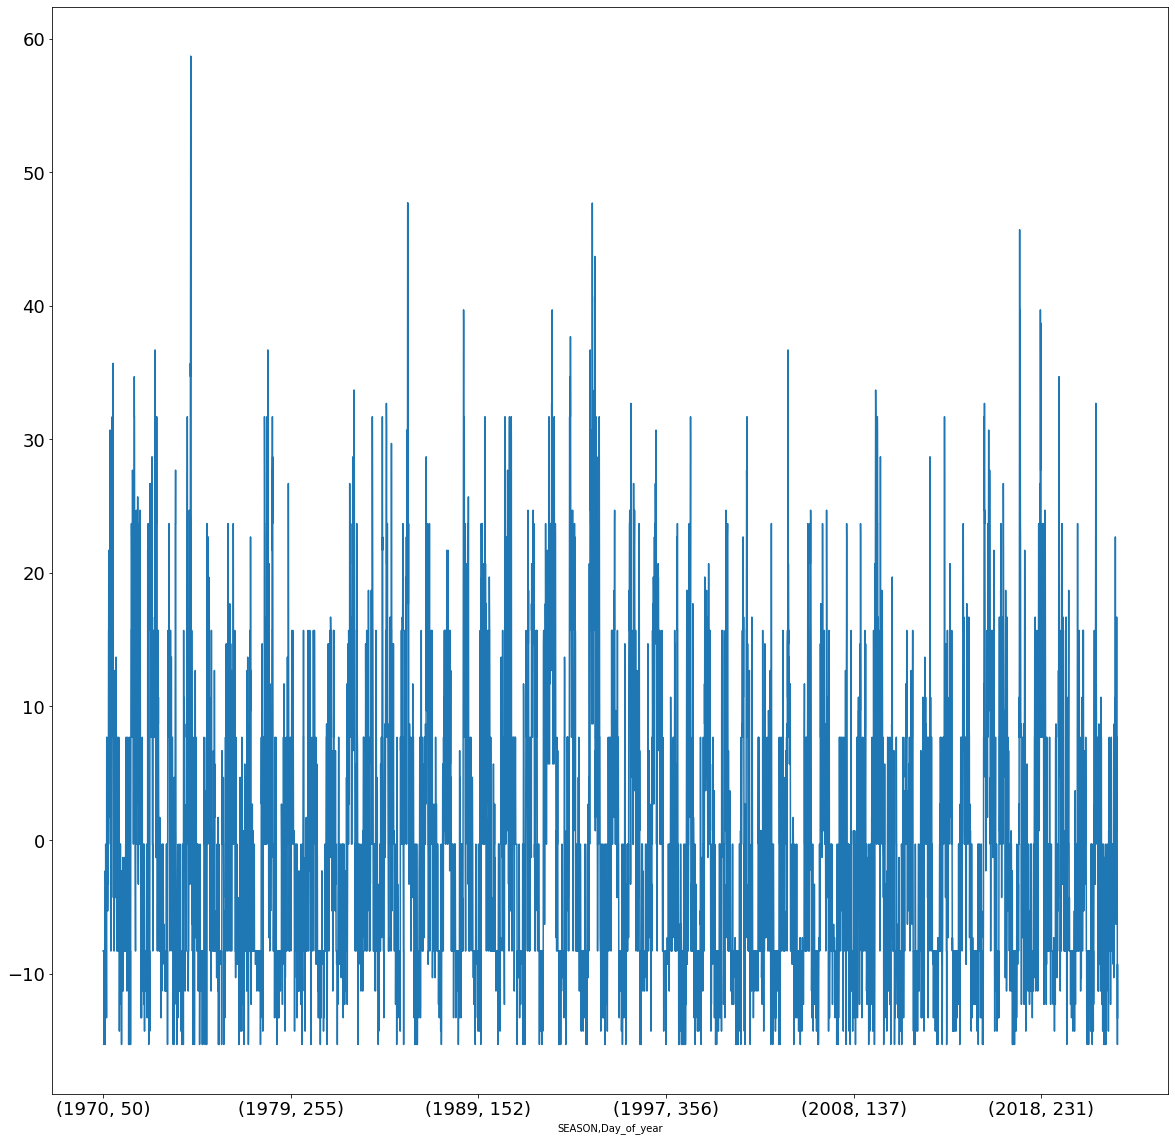

In [64]:
#3.9 the anomaly of daily counts
df4=df3.groupby(["SEASON","Day_of_year"])["SID"].count()-df3.groupby(["SEASON","Day_of_year"])["SID"].count().mean()
df4.plot(label="the anomaly of daily counts ",fontsize=18,figsize=(20,20))

<AxesSubplot:xlabel='SEASON'>

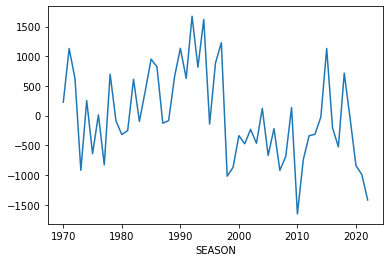

In [96]:
#3.10 resample the timerseries at annual 
df5=df3.groupby("SEASON")["SID"].count()-df3.groupby("SEASON")["SID"].count().mean()
df5.plot()
# so in 1992 or 1993 there are most anomalous hurricane activity

## Ex4 explore a data set 

In [100]:
# I dowload cfc-11 in Advanced Global Atmospheric Gases Experiment (AGAGE) as my database. Before loading it, i deal with the flie and fliter
# some information.
#4.1 load a file 

cfc11_data=pd.read_excel("cfc_11.xlsx")
cfc11_data

,year,annual Production,annaual released,Unnamed: 3,total Production,total Released,total Unreleased
0,1931,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
1,1932,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
2,1933,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
3,1934,0.045675,0.003825,NaN,0.045675,0.003825,0.041850
4,1935,0.045675,0.007875,NaN,0.091350,0.011700,0.079650
...,...,...,...,...,...,...,...
68,1999,13.064065,48.271442,NaN,8814.381800,7867.006216,947.375584
69,2000,10.048500,44.775559,NaN,8824.430300,7911.781776,912.648524
70,2001,8.435665,41.129395,NaN,8832.865965,7952.911170,879.954795
71,2002,6.896925,37.386376,NaN,8839.762890,7990.297546,849.465344


<AxesSubplot:xlabel='year'>

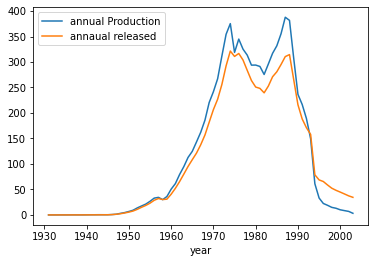

In [107]:
#4.2 plot the figure for annual production and annual released
cfc11_data.plot(x="year",y=["annual Production","annaual released"])

In [109]:
#4.3 
# find the max of annual production 
cfc11_data["annual Production"].max()
# find the max of increaing of cfc11 per year
(cfc11_data["annual Production"]-cfc11_data["annaual released"]).abs().max()

77.18835053982389

In [118]:
# the describe of data
cfc11_data.describe()
# check the data unequal to 0 
cfc11_data.loc[(cfc11_data["annual Production"])!=0|(cfc11_data["annaual released"]!=0)].count()
#  check the year with biggest released
cfc11_data.loc[cfc11_data["annaual released"]==cfc11_data["annaual released"].max()]

,year,annual Production,annaual released,Unnamed: 3,total Production,total Released,total Unreleased
43,1974,375.26986,321.433165,NaN,3025.50185,2553.958263,471.543587
